In [1]:
using Distributions
using Turing
using Stan

# Load data; loaded data is a list of dict named `ldastandata`
include(Pkg.dir("Turing")*"/example-models/stan-models/lda-stan.data.jl")
topicdata = ldastandata[1]

# Load model
include(Pkg.dir("Turing")*"/example-models/stan-models/lda.model.jl")
#= NOTE: loaded model is defined as below
@model ldamodel(K, V, M, N, w, doc, beta, alpha) = begin
  theta = Vector{Vector{Real}}(M)
  for m = 1:M
    theta[m] ~ Dirichlet(alpha)
  end

  phi = Vector{Vector{Real}}(K)
  for k = 1:K
    phi[k] ~ Dirichlet(beta)
  end

  phi_dot_theta = [log([dot(map(p -> p[i], phi), theta[m]) for i = 1:V]) for m=1:M]
  for n = 1:N
    Turing.acclogp!(vi, phi_dot_theta[doc[n]][w[n]])
  end
end
=#

[Turing]: AD chunk size is set as 40


ldamodel_vec (generic function with 9 methods)

In [2]:
setchunksize(100)    # increase AD chunk-size to 100

[Turing]: AD chunk size is set as 100


(Partials(1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),Partials(0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),Partials(0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [3]:
samples = sample(ldamodel(data=topicdata), NUTS(1000, 0.65))

[Turing]:  Assume - `theta` is a parameter
  in @~(::Any, ::Any) at compiler.jl:76
[Turing]:  Assume - `phi` is a parameter
  in @~(::Any, ::Any) at compiler.jl:76
[Turing] looking for good initial eps...
[Turing.NUTS] found initial ϵ: 0.5
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing]:  Adapted ϵ = 4.539410952991489e-76, 200 HMC iterations is used for adaption.
  in adapt_step_size(::Turing.WarmUpManager, ::Float64) at adapt.jl:54
[NUTS] Finished with
  Running time        = 249.17596517799976;
  #lf / sample        = 62.761;
  #evals / sample     = 62.763;
  pre-cond. diag mat  = [0.999999,0.999999,0.999998,0.....


Object of type "Turing.Chain"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[0.0117366 0.988263 … 0.405007 0.594993; 0.0117366 0.988263 … 0.405007 0.594993; … ; 0.0117366 0.988263 … 0.405007 0.594993; 0.0117366 0.988263 … 0.405007 0.594993]

In [4]:
# Load visualization script for topic models; visualization function is called `vis_topic_res`
include(Pkg.dir("Turing")*"/example-models/stan-models/topic_model_vis_helper.jl")

@doc vis_topic_res  # show the usage of the visualization function

Function for visualization topic models.

Usage:

```
vis_topic_res(samples, K, V, avg_range)
```

  * `samples` is the chain return by `sample()`
  * `K` is the number of topics
  * `V` is the size of vocabulary
  * `avg_range` is the end point of the running average


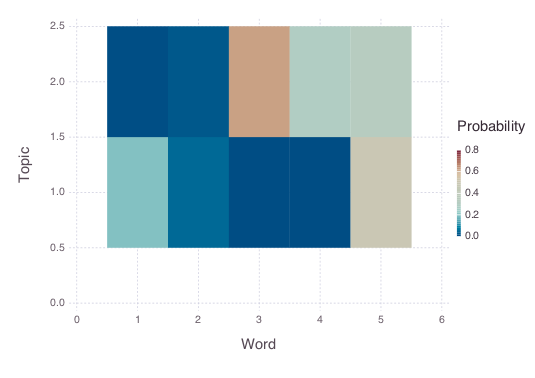

In [5]:
vis_topic_res(samples, topicdata["K"], topicdata["V"], 1000)

In [6]:
# Load data; loaded data is a list of dict named `nbstandata`
include(Pkg.dir("Turing")*"/example-models/stan-models/MoC-stan.data.jl")
topicdata2 = nbstandata[1]

# Load model
include(Pkg.dir("Turing")*"/example-models/stan-models/MoC.model.jl")
#= NOTE: loaded model is defined as below
@model nbmodel(K, V, M, N, z, w, doc, alpha, beta) = begin
  theta ~ Dirichlet(alpha)

  phi = Array{Any}(K)
  for k = 1:K
    phi[k] ~ Dirichlet(beta)
  end

  log_theta = log(theta)
  Turing.acclogp!(vi, sum(log_theta[z[1:M]]))

  log_phi = map(x->log(x), phi)
  for n = 1:N
    Turing.acclogp!(vi, log_phi[z[doc[n]]][w[n]])
  end

  phi
end

=#

nbmodel (generic function with 10 methods)

In [7]:
samples2 = sample(nbmodel(data=topicdata2), NUTS(1000, 0.65))

[Turing]:  Assume - `theta` is a parameter
  in @~(::Any, ::Any) at compiler.jl:76
[Turing]:  Assume - `phi` is a parameter
  in @~(::Any, ::Any) at compiler.jl:76
[Turing] looking for good initial eps...
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:87
[Turing.NUTS] found initial ϵ: 0.605
[Turing]:  Adapted ϵ = 1.1348527382479003e-76, 200 HMC iterations is used for adaption.
  in adapt_step_size(::Turing.WarmUpManager, ::Float64) at adapt.jl:54
[NUTS] Finished with
  Running time        = 2.253066046;
  #lf / sample        = 1.003;
  #evals / sample     = 1.005;
  pre-cond. diag mat  = [0.999997,0.999994,0.999994,0.....


Object of type "Turing.Chain"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[0.0394719 0.67126 … 1.10815e-7 0.0209499; 0.0394719 0.67126 … 1.10815e-7 0.0209499; … ; 0.0394719 0.67126 … 1.10815e-7 0.0209499; 0.0394719 0.67126 … 1.10815e-7 0.0209499]

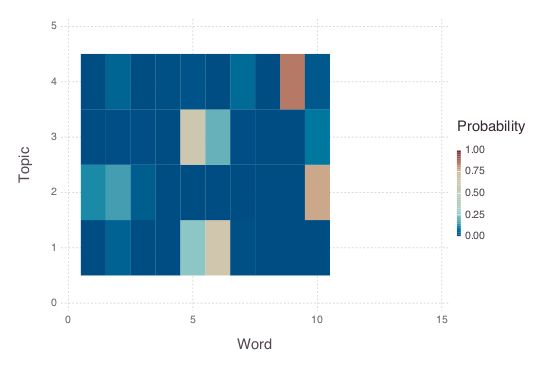

In [8]:
vis_topic_res(samples2, topicdata2["K"], topicdata2["V"], 1000)

In [9]:
using ProgressMeter

In [10]:
x,n = 1,10
p = Progress(n)
for iter = 1:10
    x *= 2
    sleep(0.5)
    ProgressMeter.next!(p; showvalues = [(:iter,iter), (:x,x)])
end